In [23]:
import numpy as np
import pandas as pd

from sklearn import preprocessing, metrics, tree
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.model_selection import cross_val_score

# Company_Data.csv

# 1 - Business Problem

Prepare a decision tree can be built with target variable Sale for company_data


# 2 - Data collection and description

In [2]:
data = pd.read_csv(r'Company_Data.csv')

In [3]:
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [4]:
data1 = data.copy()

# EDA

In [5]:
data1.shape

(400, 11)

In [6]:
data1 = pd.get_dummies(data1, columns = ['ShelveLoc','Urban','US'])

In [7]:
data1.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales,400.0,7.496325,2.824115,0.0,5.39,7.49,9.32,16.27
CompPrice,400.0,124.975000,15.334512,77.0,115.00,125.00,135.00,175.00
Income,400.0,68.657500,27.986037,21.0,42.75,69.00,91.00,120.00
Advertising,400.0,6.635000,6.650364,0.0,0.00,5.00,12.00,29.00
Population,400.0,264.840000,147.376436,10.0,139.00,272.00,398.50,509.00
Price,400.0,115.795000,23.676664,24.0,100.00,117.00,131.00,191.00
Age,400.0,53.322500,16.200297,25.0,39.75,54.50,66.00,80.00
Education,400.0,13.900000,2.620528,10.0,12.00,14.00,16.00,18.00
ShelveLoc_Bad,400.0,0.240000,0.427618,0.0,0.00,0.00,0.00,1.00
ShelveLoc_Good,400.0,0.212500,0.409589,0.0,0.00,0.00,0.00,1.00


In [8]:
data1.isnull().sum()

Sales               0
CompPrice           0
Income              0
Advertising         0
Population          0
Price               0
Age                 0
Education           0
ShelveLoc_Bad       0
ShelveLoc_Good      0
ShelveLoc_Medium    0
Urban_No            0
Urban_Yes           0
US_No               0
US_Yes              0
dtype: int64

Correlation

In [9]:
cor = data1.corr()
cor

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,-0.231815,-0.051955,-0.393167,0.500510,-0.073999,0.015419,-0.015419,-0.177093,0.177093
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197,-0.035393,0.026386,0.008683,-0.066594,0.066594,-0.016869,0.016869
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855,0.072017,-0.012657,-0.051392,-0.037967,0.037967,-0.089601,0.089601
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594,-0.035217,0.056149,-0.015929,-0.042035,0.042035,-0.684460,0.684460
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378,0.039902,0.007789,-0.040640,0.052025,-0.052025,-0.060564,0.060564
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747,-0.036220,0.045854,-0.006607,-0.047016,0.047016,-0.057861,0.057861
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488,-0.044123,-0.022818,0.056613,-0.028479,0.028479,-0.008652,0.008652
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000,0.012525,-0.029188,0.013242,0.033094,-0.033094,0.078250,-0.078250
ShelveLoc_Bad,-0.393167,-0.035393,0.072017,-0.035217,0.039902,-0.036220,-0.044123,0.012525,1.000000,-0.291913,-0.618133,-0.081122,0.081122,-0.000979,0.000979
ShelveLoc_Good,0.500510,0.026386,-0.012657,0.056149,0.007789,0.045854,-0.022818,-0.029188,-0.291913,1.000000,-0.571396,0.039197,-0.039197,-0.078864,0.078864


<AxesSubplot:>

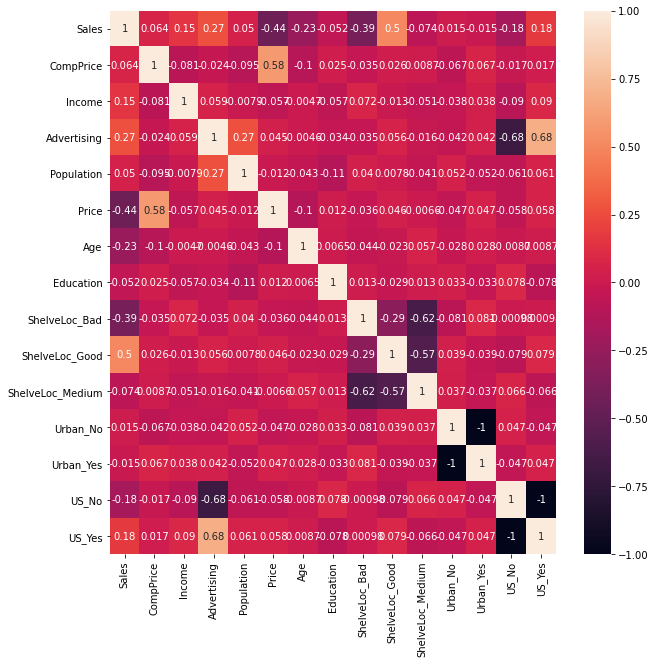

In [10]:
plt.figure(figsize=(10,10))
sns.heatmap(cor,annot=True)

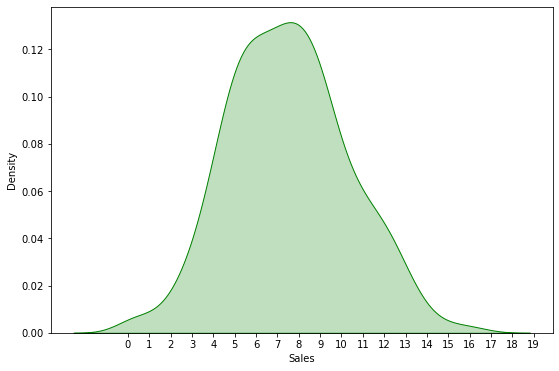

In [11]:
plt.figure(figsize=(9,6))
ax = sns.kdeplot(data1['Sales'],shade=True,color='g')
plt.xticks([i for i in range(0,20,1)])
plt.show()

The data is Skwed on the right

The data has negative Kurtosis

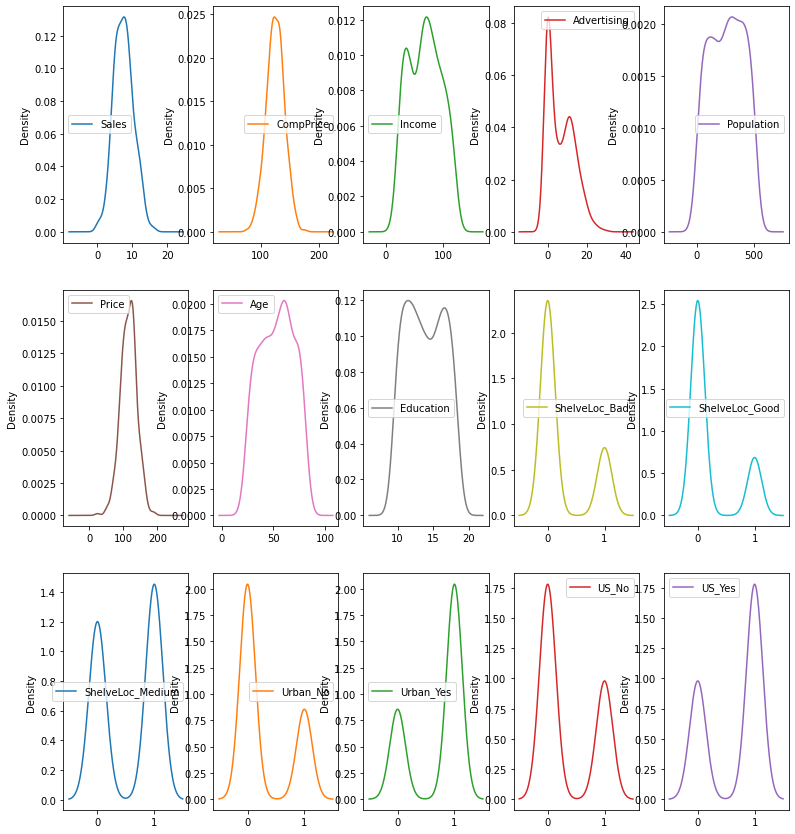

In [12]:
data1.plot(kind='density', subplots=True, layout=(4,5), figsize=(13,20), sharex=False, sharey=False)
plt.show()

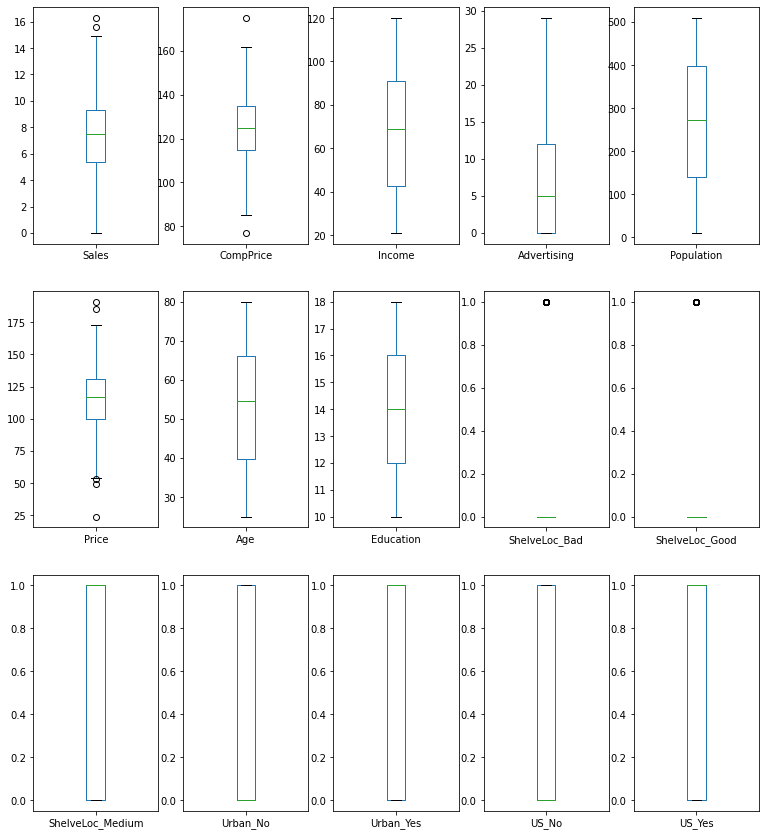

In [13]:
data1.plot(kind='box', subplots=True, layout=(4,5), figsize=(13,20), sharex=False, sharey=False)
plt.show()

In [14]:
num_columns = data1.select_dtypes(exclude='object').columns.tolist()
num_data = data1[num_columns]
pd.DataFrame(data=[num_data.skew(),num_data.kurtosis()],index=['skewness','kurtosis'])

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
skewness,0.185560,-0.042755,0.049444,0.639586,-0.051227,-0.125286,-0.077182,0.044007,1.222149,1.410901,-0.191582,0.902426,-0.902426,0.608327,-0.608327
kurtosis,-0.080877,0.041666,-1.085289,-0.545118,-1.202318,0.451885,-1.134392,-1.298332,-0.508921,-0.009431,-1.973187,-1.191610,-1.191610,-1.638154,-1.638154


# Decision Tree

Since the target variable is continious, we create a class of the value based on the mean

<= 7.49 == "Small" and > 7.49 == "large"

In [15]:
data1["sales"]="small"
data1

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes,sales
0,9.50,138,73,11,276,120,42,17,1,0,0,0,1,0,1,small
1,11.22,111,48,16,260,83,65,10,0,1,0,0,1,0,1,small
2,10.06,113,35,10,269,80,59,12,0,0,1,0,1,0,1,small
3,7.40,117,100,4,466,97,55,14,0,0,1,0,1,0,1,small
4,4.15,141,64,3,340,128,38,13,1,0,0,0,1,1,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14,0,1,0,0,1,0,1,small
396,6.14,139,23,3,37,120,55,11,0,0,1,1,0,0,1,small
397,7.41,162,26,12,368,159,40,18,0,0,1,0,1,0,1,small
398,5.94,100,79,7,284,95,50,12,1,0,0,0,1,0,1,small


In [16]:
data1.loc[data1["Sales"]>7.49,"sales"]="large"
data1

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes,sales
0,9.50,138,73,11,276,120,42,17,1,0,0,0,1,0,1,large
1,11.22,111,48,16,260,83,65,10,0,1,0,0,1,0,1,large
2,10.06,113,35,10,269,80,59,12,0,0,1,0,1,0,1,large
3,7.40,117,100,4,466,97,55,14,0,0,1,0,1,0,1,small
4,4.15,141,64,3,340,128,38,13,1,0,0,0,1,1,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14,0,1,0,0,1,0,1,large
396,6.14,139,23,3,37,120,55,11,0,0,1,1,0,0,1,small
397,7.41,162,26,12,368,159,40,18,0,0,1,0,1,0,1,small
398,5.94,100,79,7,284,95,50,12,1,0,0,0,1,0,1,small


In [17]:
data1.drop(["Sales"],axis=1,inplace=True)
data1

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes,sales
0,138,73,11,276,120,42,17,1,0,0,0,1,0,1,large
1,111,48,16,260,83,65,10,0,1,0,0,1,0,1,large
2,113,35,10,269,80,59,12,0,0,1,0,1,0,1,large
3,117,100,4,466,97,55,14,0,0,1,0,1,0,1,small
4,141,64,3,340,128,38,13,1,0,0,0,1,1,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,33,14,0,1,0,0,1,0,1,large
396,139,23,3,37,120,55,11,0,0,1,1,0,0,1,small
397,162,26,12,368,159,40,18,0,0,1,0,1,0,1,small
398,100,79,7,284,95,50,12,1,0,0,0,1,0,1,small


In [18]:
X = data1.iloc[:,0:14]
Y = data1.iloc[:,14]

In [19]:
X

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,138,73,11,276,120,42,17,1,0,0,0,1,0,1
1,111,48,16,260,83,65,10,0,1,0,0,1,0,1
2,113,35,10,269,80,59,12,0,0,1,0,1,0,1
3,117,100,4,466,97,55,14,0,0,1,0,1,0,1
4,141,64,3,340,128,38,13,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,33,14,0,1,0,0,1,0,1
396,139,23,3,37,120,55,11,0,0,1,1,0,0,1
397,162,26,12,368,159,40,18,0,0,1,0,1,0,1
398,100,79,7,284,95,50,12,1,0,0,0,1,0,1


In [20]:
Y

0      large
1      large
2      large
3      small
4      small
       ...  
395    large
396    small
397    small
398    small
399    large
Name: sales, Length: 400, dtype: object

In [21]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=0)

In [22]:
model = DT(criterion='entropy') 
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

# Plot the decision tree

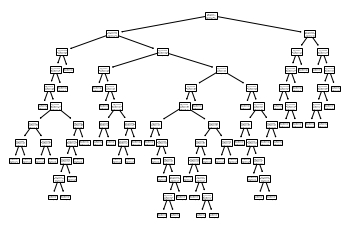

In [24]:
#PLot the decision tree

tree.plot_tree(model);

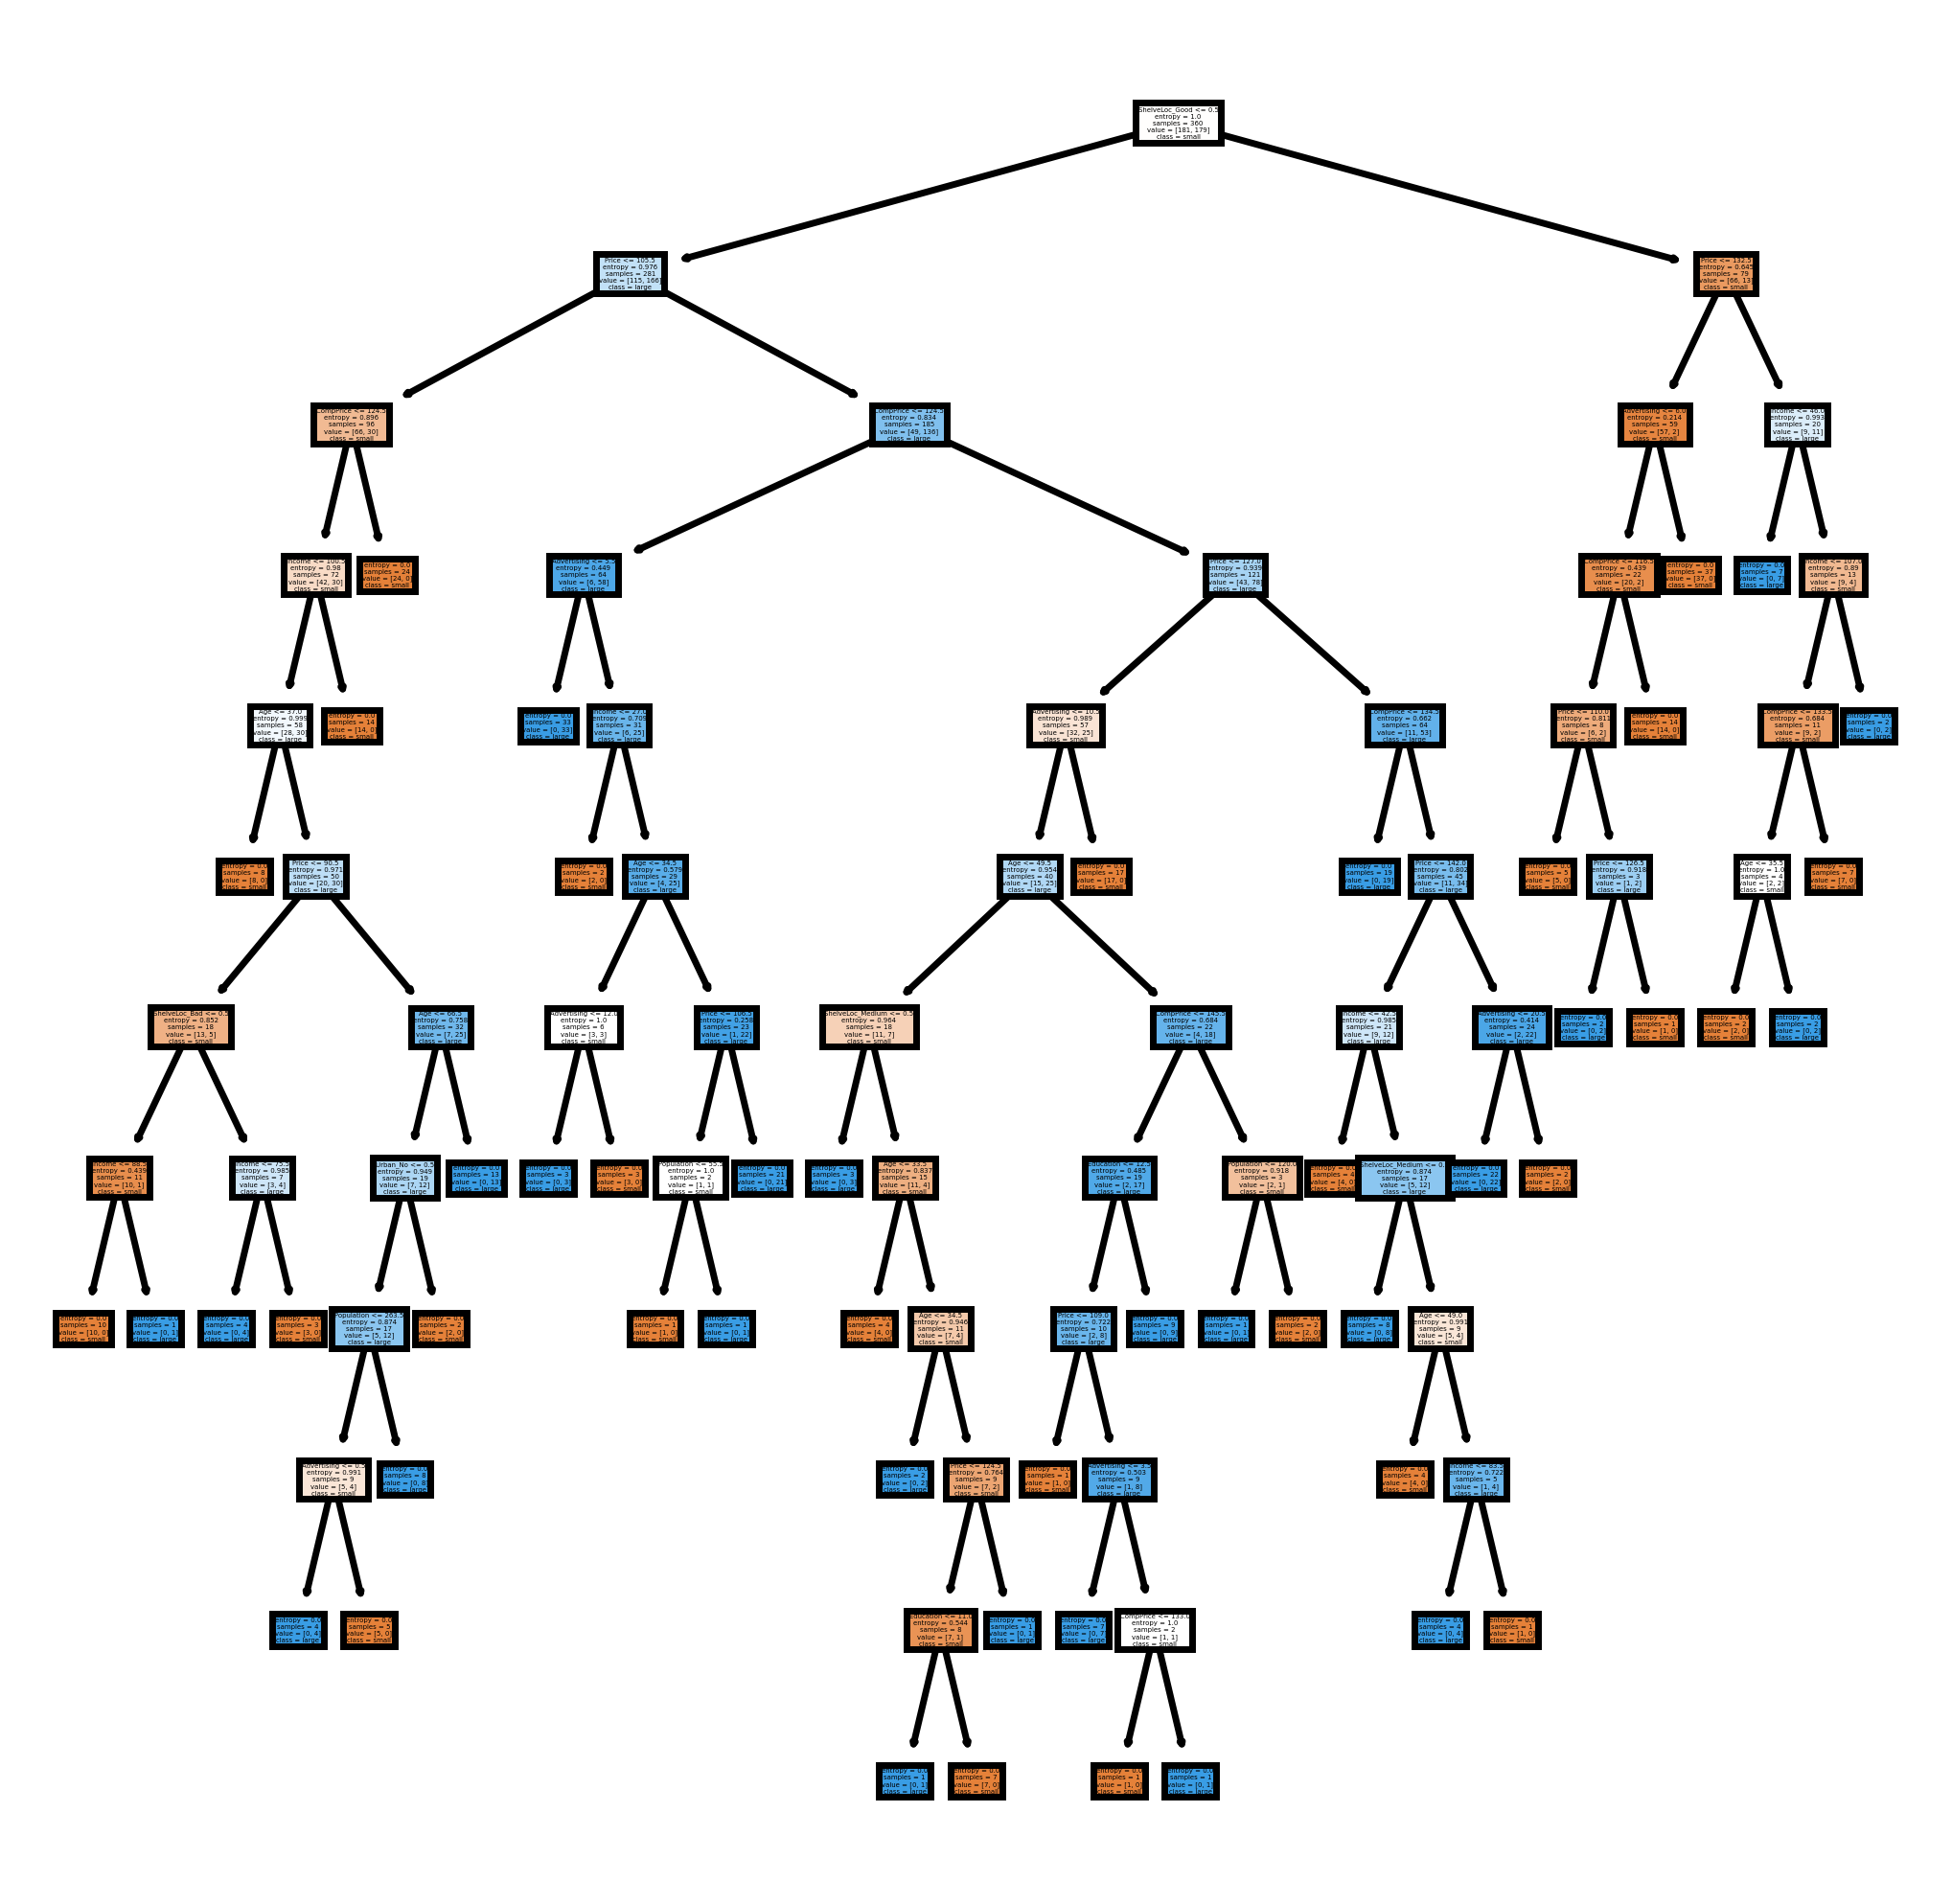

In [37]:
fn=data1.columns #.columns
cn=['small', 'large']    #.value_count.keys
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5), dpi=500)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [38]:
pred_train = model.predict(x_train)

In [39]:
pred_train

array(['small', 'large', 'small', 'large', 'small', 'small', 'large',
       'large', 'large', 'large', 'small', 'large', 'large', 'large',
       'small', 'large', 'large', 'large', 'large', 'small', 'small',
       'large', 'small', 'small', 'small', 'large', 'large', 'large',
       'small', 'large', 'large', 'large', 'large', 'small', 'large',
       'large', 'large', 'large', 'large', 'large', 'small', 'large',
       'small', 'small', 'large', 'large', 'small', 'small', 'large',
       'large', 'large', 'small', 'large', 'small', 'large', 'small',
       'small', 'small', 'small', 'large', 'large', 'large', 'small',
       'large', 'small', 'large', 'large', 'large', 'small', 'small',
       'large', 'large', 'large', 'large', 'small', 'small', 'small',
       'large', 'small', 'small', 'small', 'small', 'large', 'large',
       'small', 'small', 'small', 'large', 'large', 'small', 'large',
       'small', 'large', 'large', 'large', 'small', 'small', 'small',
       'small', 'lar

In [40]:
accuracy_score(y_train,pred_train)

1.0

In [41]:
confusion_matrix(y_train,pred_train)

array([[181,   0],
       [  0, 179]], dtype=int64)

In [42]:
pred_test = model.predict(x_test)

In [43]:
pred_test

array(['small', 'large', 'large', 'small', 'small', 'large', 'large',
       'small', 'large', 'small', 'small', 'small', 'large', 'large',
       'small', 'small', 'large', 'small', 'small', 'small', 'small',
       'small', 'large', 'large', 'small', 'large', 'small', 'small',
       'small', 'large', 'large', 'large', 'large', 'large', 'small',
       'large', 'large', 'large', 'small', 'large'], dtype=object)

In [44]:
accuracy_score(y_test,pred_test)

0.7

In [45]:
confusion_matrix(y_test,pred_test)

array([[13,  5],
       [ 7, 15]], dtype=int64)

In [46]:
df = pd.DataFrame({'Actual':y_test,'Predicted':pred_test})
df

,Actual,Predicted
132,large,small
309,large,large
341,small,large
196,small,small
246,small,small
60,large,large
155,large,large
261,small,small
141,small,large
214,small,small


# Conclusion

Since the accuracy of the Training set is 100% we test the accurancy on the test data which is 72%

As seen in the confusion matrix of Test data 29 instances are presdected correctly and 11 instances are not

# FRAUD_CHECK.CSV

# 1 - Business Problem

Use decision trees to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"




# 2 - Data collection and description

In [47]:
data = pd.read_csv(r'Fraud_check.csv')

In [48]:
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [49]:
data1 = data.copy()

In [50]:
data1 = pd.get_dummies(data1, columns = ['Undergrad','Marital.Status','Urban'])

# EDA

In [51]:
data1.shape

(600, 10)

In [52]:
data1.describe().T

,count,mean,std,min,25%,50%,75%,max
Taxable.Income,600.0,55208.375000,26204.827597,10003.0,32871.50,55074.5,78611.75,99619.0
City.Population,600.0,108747.368333,49850.075134,25779.0,66966.75,106493.5,150114.25,199778.0
Work.Experience,600.0,15.558333,8.842147,0.0,8.00,15.0,24.00,30.0
Undergrad_NO,600.0,0.480000,0.500017,0.0,0.00,0.0,1.00,1.0
Undergrad_YES,600.0,0.520000,0.500017,0.0,0.00,1.0,1.00,1.0
Marital.Status_Divorced,600.0,0.315000,0.464903,0.0,0.00,0.0,1.00,1.0
Marital.Status_Married,600.0,0.323333,0.468139,0.0,0.00,0.0,1.00,1.0
Marital.Status_Single,600.0,0.361667,0.480884,0.0,0.00,0.0,1.00,1.0
Urban_NO,600.0,0.496667,0.500406,0.0,0.00,0.0,1.00,1.0
Urban_YES,600.0,0.503333,0.500406,0.0,0.00,1.0,1.00,1.0


In [53]:
data1.isnull().sum()

Taxable.Income             0
City.Population            0
Work.Experience            0
Undergrad_NO               0
Undergrad_YES              0
Marital.Status_Divorced    0
Marital.Status_Married     0
Marital.Status_Single      0
Urban_NO                   0
Urban_YES                  0
dtype: int64

Correlation

In [54]:
cor = data1.corr()
cor

,Taxable.Income,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
Taxable.Income,1.000000,-0.064387,-0.001818,0.049232,-0.049232,0.062099,-0.100611,0.037910,-0.070628,0.070628
City.Population,-0.064387,1.000000,0.013135,-0.079579,0.079579,0.004925,-0.007035,0.002087,0.040098,-0.040098
Work.Experience,-0.001818,0.013135,1.000000,0.005362,-0.005362,-0.014833,0.033347,-0.018123,0.094559,-0.094559
Undergrad_NO,0.049232,-0.079579,0.005362,1.000000,-1.000000,0.045101,-0.015120,-0.028883,-0.000267,0.000267
Undergrad_YES,-0.049232,0.079579,-0.005362,-1.000000,1.000000,-0.045101,0.015120,0.028883,0.000267,-0.000267
Marital.Status_Divorced,0.062099,0.004925,-0.014833,0.045101,-0.045101,1.000000,-0.468757,-0.510435,0.065518,-0.065518
Marital.Status_Married,-0.100611,-0.007035,0.033347,-0.015120,0.015120,-0.468757,1.000000,-0.520317,-0.016771,0.016771
Marital.Status_Single,0.037910,0.002087,-0.018123,-0.028883,0.028883,-0.510435,-0.520317,1.000000,-0.047014,0.047014
Urban_NO,-0.070628,0.040098,0.094559,-0.000267,0.000267,0.065518,-0.016771,-0.047014,1.000000,-1.000000
Urban_YES,0.070628,-0.040098,-0.094559,0.000267,-0.000267,-0.065518,0.016771,0.047014,-1.000000,1.000000


<AxesSubplot:>

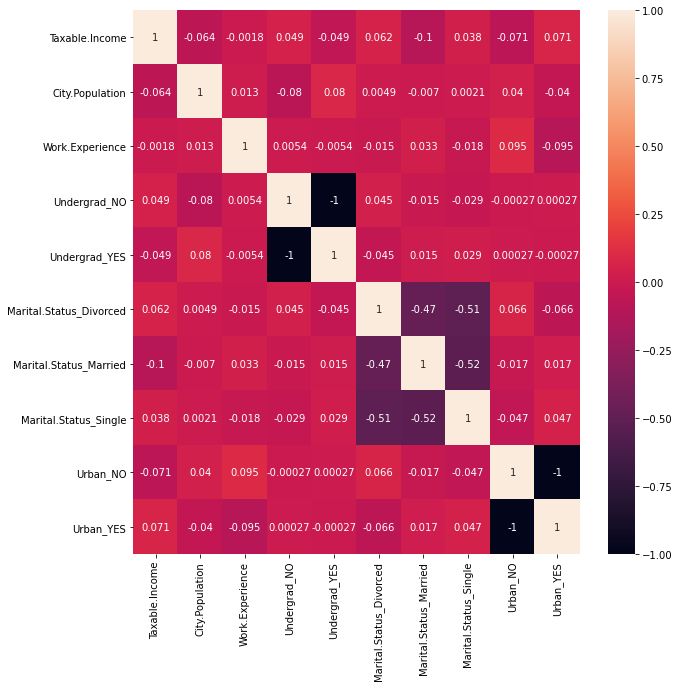

In [55]:
plt.figure(figsize=(10,10))
sns.heatmap(cor,annot=True)

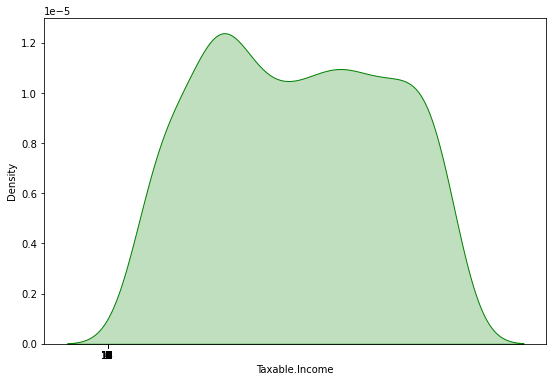

In [56]:
plt.figure(figsize=(9,6))
ax = sns.kdeplot(data1['Taxable.Income'],shade=True,color='g')
plt.xticks([i for i in range(0,20,1)])
plt.show()

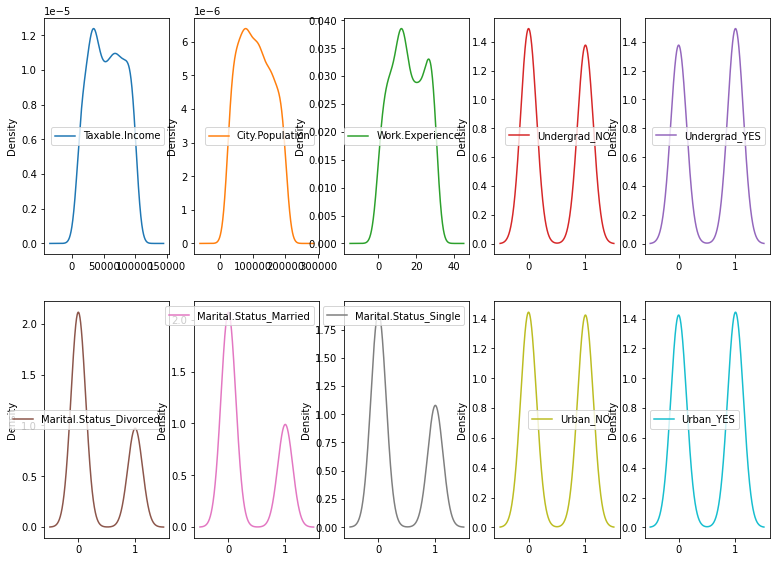

In [57]:
data1.plot(kind='density', subplots=True, layout=(4,5), figsize=(13,20), sharex=False, sharey=False)
plt.show()

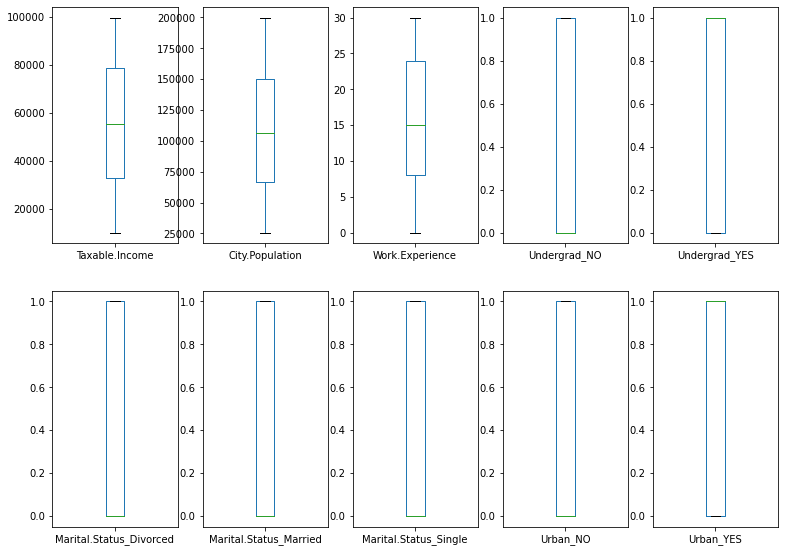

In [58]:
data1.plot(kind='box', subplots=True, layout=(4,5), figsize=(13,20), sharex=False, sharey=False)
plt.show()

In [59]:
num_columns = data1.select_dtypes(exclude='object').columns.tolist()
num_data = data1[num_columns]
pd.DataFrame(data=[num_data.skew(),num_data.kurtosis()],index=['skewness','kurtosis'])

,Taxable.Income,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
skewness,0.030015,0.125009,0.018529,0.080265,-0.080265,0.798526,0.757286,0.577254,0.013367,-0.013367
kurtosis,-1.199782,-1.120154,-1.167524,-2.000236,-2.000236,-1.366924,-1.431300,-1.672364,-2.006521,-2.006521


# Decision Tree

Since the target variable is continious, we create a class of the value based on the 

taxable_income <= 30000 as "Risky" and others are "Good"

In [60]:
data1['tax'] = 'Good'
data1

,Taxable.Income,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES,tax
0,68833,50047,10,1,0,0,0,1,0,1,Good
1,33700,134075,18,0,1,1,0,0,0,1,Good
2,36925,160205,30,1,0,0,1,0,0,1,Good
3,50190,193264,15,0,1,0,0,1,0,1,Good
4,81002,27533,28,1,0,0,1,0,1,0,Good
...,...,...,...,...,...,...,...,...,...,...,...
595,76340,39492,7,0,1,1,0,0,0,1,Good
596,69967,55369,2,0,1,1,0,0,0,1,Good
597,47334,154058,0,1,0,1,0,0,0,1,Good
598,98592,180083,17,0,1,0,1,0,1,0,Good


In [61]:

data1.loc[data1['Taxable.Income']<=30000,"tax"]="Risky"
data1

,Taxable.Income,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES,tax
0,68833,50047,10,1,0,0,0,1,0,1,Good
1,33700,134075,18,0,1,1,0,0,0,1,Good
2,36925,160205,30,1,0,0,1,0,0,1,Good
3,50190,193264,15,0,1,0,0,1,0,1,Good
4,81002,27533,28,1,0,0,1,0,1,0,Good
...,...,...,...,...,...,...,...,...,...,...,...
595,76340,39492,7,0,1,1,0,0,0,1,Good
596,69967,55369,2,0,1,1,0,0,0,1,Good
597,47334,154058,0,1,0,1,0,0,0,1,Good
598,98592,180083,17,0,1,0,1,0,1,0,Good


In [62]:
data1.drop(['Taxable.Income'],axis=1,inplace=True)

In [63]:
data1

,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES,tax
0,50047,10,1,0,0,0,1,0,1,Good
1,134075,18,0,1,1,0,0,0,1,Good
2,160205,30,1,0,0,1,0,0,1,Good
3,193264,15,0,1,0,0,1,0,1,Good
4,27533,28,1,0,0,1,0,1,0,Good
...,...,...,...,...,...,...,...,...,...,...
595,39492,7,0,1,1,0,0,0,1,Good
596,55369,2,0,1,1,0,0,0,1,Good
597,154058,0,1,0,1,0,0,0,1,Good
598,180083,17,0,1,0,1,0,1,0,Good


In [64]:
X = data1.iloc[:,0:9]
Y = data1.iloc[:,9]

In [65]:
X

,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
0,50047,10,1,0,0,0,1,0,1
1,134075,18,0,1,1,0,0,0,1
2,160205,30,1,0,0,1,0,0,1
3,193264,15,0,1,0,0,1,0,1
4,27533,28,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...
595,39492,7,0,1,1,0,0,0,1
596,55369,2,0,1,1,0,0,0,1
597,154058,0,1,0,1,0,0,0,1
598,180083,17,0,1,0,1,0,1,0


In [66]:
Y

0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
595    Good
596    Good
597    Good
598    Good
599    Good
Name: tax, Length: 600, dtype: object

In [67]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=.1,random_state=0)


In [68]:
model = DT(criterion='entropy')
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

# Plot the decision Tree

[Text(248.79711277173914, 213.55714285714285, 'X[1] <= 24.5\nentropy = 0.718\nsamples = 540\nvalue = [433, 107]'),
 Text(201.9148777173913, 205.79142857142858, 'X[0] <= 197770.0\nentropy = 0.757\nsamples = 421\nvalue = [329, 92]'),
 Text(158.64334239130434, 198.0257142857143, 'X[1] <= 13.5\nentropy = 0.748\nsamples = 417\nvalue = [328, 89]'),
 Text(83.01766304347827, 190.26, 'X[1] <= 11.5\nentropy = 0.67\nsamples = 245\nvalue = [202, 43]'),
 Text(52.3125, 182.4942857142857, 'X[0] <= 80947.5\nentropy = 0.73\nsamples = 201\nvalue = [160, 41]'),
 Text(16.37608695652174, 174.72857142857143, 'X[0] <= 27057.0\nentropy = 0.544\nsamples = 64\nvalue = [56, 8]'),
 Text(12.736956521739131, 166.96285714285713, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(20.015217391304347, 166.96285714285713, 'X[0] <= 32282.0\nentropy = 0.503\nsamples = 63\nvalue = [56, 7]'),
 Text(16.37608695652174, 159.19714285714286, 'entropy = 0.0\nsamples = 10\nvalue = [10, 0]'),
 Text(23.65434782608696, 159.19714285

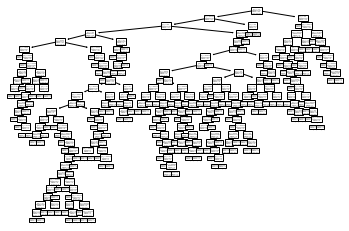

In [69]:
tree.plot_tree(model)

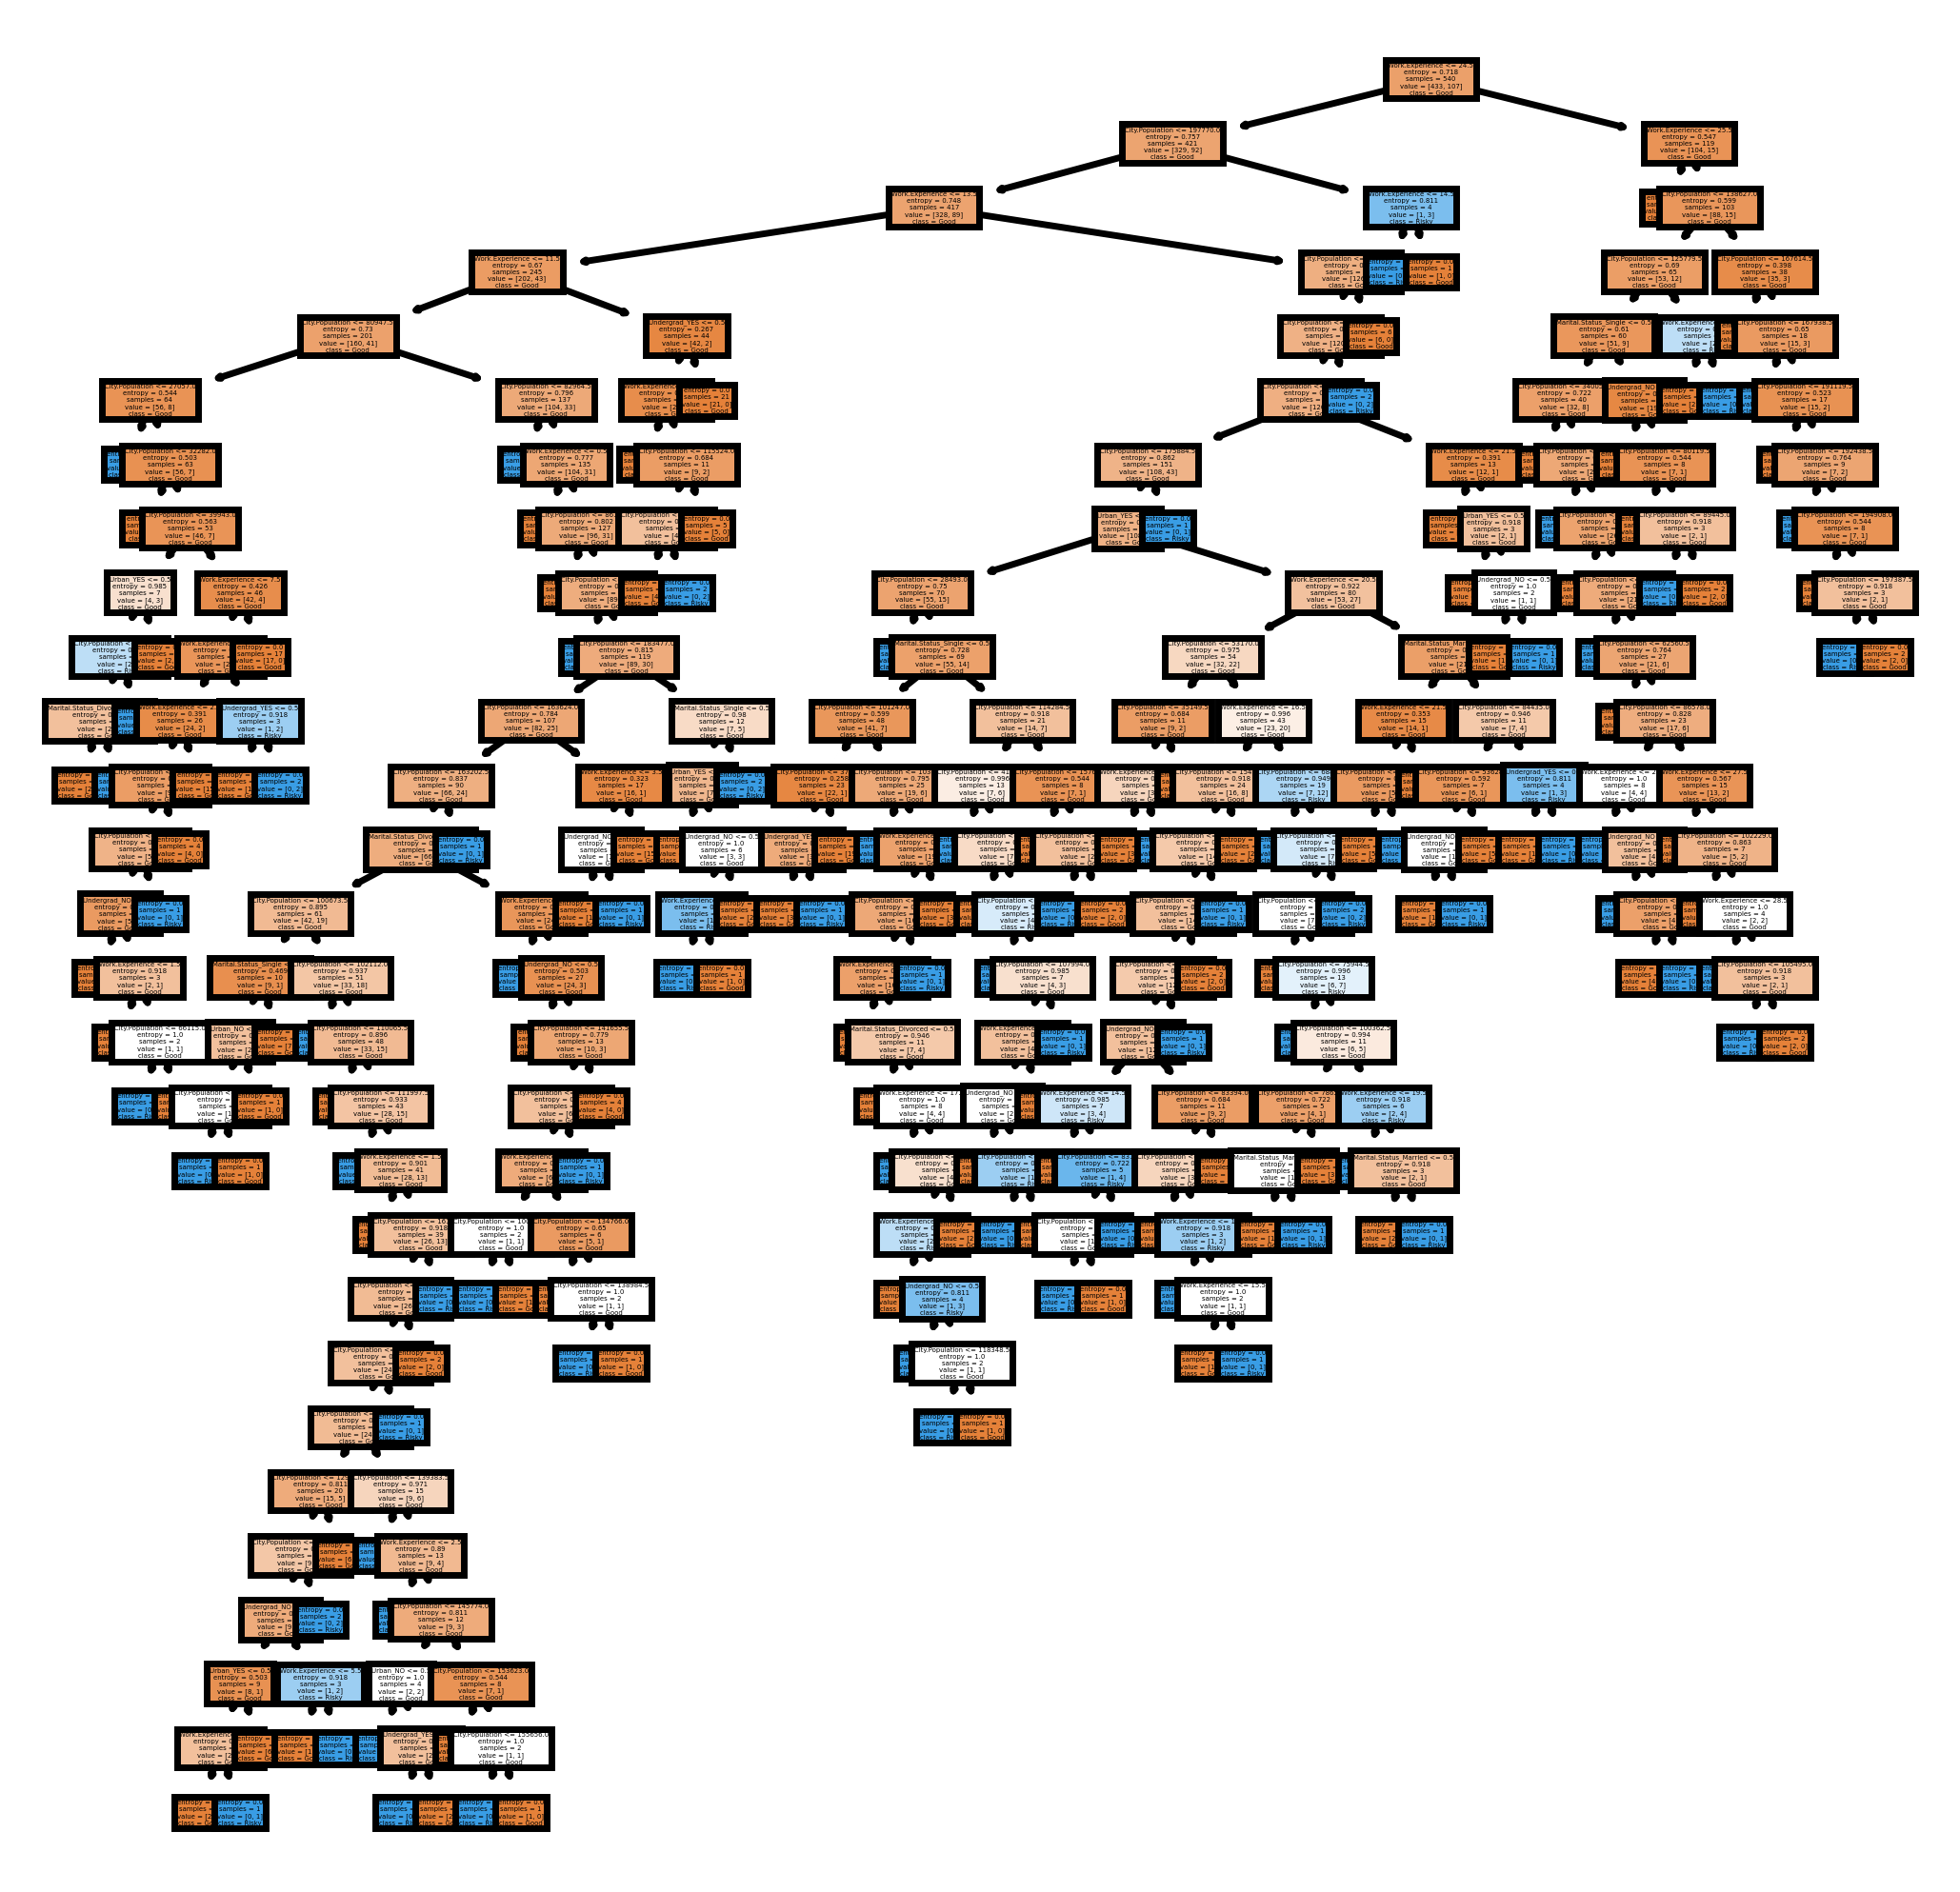

In [70]:
fn=data1.columns #.columns
cn=['Good', 'Risky']    #.value_count.keys
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5), dpi=500)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [71]:
pred_train = model.predict(x_train)

In [72]:
pred_train

array(['Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Risky', 'Good',
       'Risky', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Risky', 'Good', 'Risky', 'Risky', 'Risky', 'Risky',
       'Good', 'Good', 'Risky', 'Good', 'Risky', 'Risky', 'Good', 'Good',
       'Risky', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Risky', 'Risky', 'Good', 'Risky', 'Risky', 'Good', 'Good',
       'Risky', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Risky',
       'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risky'

In [73]:
accuracy_score(y_train,pred_train)

1.0

In [74]:
confusion_matrix(y_train,pred_train)

array([[433,   0],
       [  0, 107]], dtype=int64)

In [75]:
pred_test = model.predict(x_test)
pred_test

array(['Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Risky',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Risky', 'Good',
       'Good', 'Risky', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Risky', 'Good', 'Good', 'Risky', 'Risky', 'Good', 'Risky',
       'Risky', 'Risky', 'Risky', 'Good', 'Good', 'Risky', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Good', 'Risky', 'Good', 'Good', 'Risky'], dtype=object)

In [76]:
accuracy_score(y_test,pred_test)

0.5166666666666667

In [77]:
confusion_matrix(y_test,pred_test)

array([[28, 15],
       [14,  3]], dtype=int64)

In [78]:
df = pd.DataFrame({'Actual':y_test,'Predicted':pred_test})
df

,Actual,Predicted
434,Risky,Good
122,Risky,Good
224,Good,Good
479,Good,Good
205,Risky,Risky
569,Good,Good
432,Good,Good
526,Risky,Good
439,Risky,Good
162,Good,Good


# Conclusion

Since the accuracy of the Training set is 100% we test the accurancy on the test data which is 45%

As seen in the confusion matrix of Test data 27 instances are presdected correctly and 33 instances are not